In [18]:
#import libraries
import numpy as np
import scipy as scipy
from scipy import misc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [19]:
#load the data
train = pd.read_csv('training_A3.csv')
test = pd.read_csv('test_A3.csv')

## DATA PREPARATION 

In [20]:
#split train dataset in x (independent) and y (dependent)
train_x_a = train.drop("price",axis=1)
train_y = train[["price"]]

train_x_a.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
2,gas,std,four,sedan,fwd,front,94.5,165.3,63.8,54.5,...,four,NaN,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
3,gas,std,four,sedan,rwd,front,104.5,187.8,66.5,54.1,...,six,171.0,mpfi,3.27,3.35,9.2,156.0,5200.0,20.0,24.0
4,gas,std,four,sedan,fwd,front,93.7,167.3,NaN,50.8,...,four,90.0,2bbl,2.97,3.23,9.4,68.0,5500.0,31.0,38.0


In [21]:
#view null rows in price column
train_y[pd.isnull(train_y).any(axis = 1)]

,price
18,NaN
37,NaN
47,NaN
69,NaN
71,NaN
81,NaN
82,NaN
100,NaN
107,NaN


In [22]:
##Delete rows that dependent has null value
train_x_a = train_x_a.drop([18,37,47,69,71,81,82,100,107])
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [23]:
#find columns containing missing (NaN) values, store column names in a list called nan_columns:
train_x_a.isnull().sum()

fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            8
carlength            4
carwidth             7
carheight            9
curbweight           6
enginetype           0
cylindernumber       0
enginesize          10
fuelsystem           0
boreratio           11
stroke               3
compressionratio    11
horsepower           5
peakrpm              9
citympg              4
highwaympg           7
dtype: int64

In [24]:
##fill missing values of nan column with median
nan_train_columns = train_x_a[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
train_x_b = nan_train_columns.fillna(nan_train_columns.median())
median_values = nan_train_columns.median()
#drop null values from train_y
train_y = train_y.dropna(subset = ['price'])

In [25]:
##columns that contain categorical values
categorical_columns = (train_x_a.loc[:, train_x_a.dtypes == object])
train_x_c = pd.Categorical(categorical_columns)
train_x_c = pd.get_dummies(categorical_columns)
train_x_d = pd.concat([train_x_b, train_x_c], axis = 1)

In [26]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x_e = ss.fit_transform(train_x_d)
train_x_e = pd.DataFrame(train_x_e, columns = train_x_d.columns)



In [27]:
test_x = pd.DataFrame(test,  columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'])
test_y = pd.DataFrame(test,  columns = ['price'])

test_y[pd.isnull(test_y).any(axis = 1)]


,price
10,NaN


In [28]:
test_x = test_x.drop([10])
test_x.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,...,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
1,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,...,four,110.0,1bbl,3.15,3.58,9.0,86.0,NaN,27.0,33.0
2,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,...,five,183.0,idi,3.58,3.64,21.5,123.0,4350.0,22.0,25.0
3,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,...,six,258.0,mpfi,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
4,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,...,six,194.0,mpfi,3.74,2.90,9.5,207.0,5900.0,17.0,NaN


In [29]:
test_x.isnull().sum()

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           3
carlength           1
carwidth            1
carheight           2
curbweight          3
enginetype          0
cylindernumber      0
enginesize          1
fuelsystem          0
boreratio           0
stroke              1
compressionratio    1
horsepower          3
peakrpm             2
citympg             2
highwaympg          1
dtype: int64

In [30]:
##Fill missing value of nan column with median values
nancols = test_x[['carwidth','wheelbase','carheight','carlength','stroke','curbweight','enginesize','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
test_x_a = nancols.fillna(median_values)

test_x_a = pd.concat([test_x['boreratio'], test_x_a ], axis = 1)
test_y = test_y.dropna(subset = ['price'])
test_x_a.head()

,boreratio,carwidth,wheelbase,carheight,carlength,stroke,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3.19,71.4,105.8,55.7,192.7,3.40,2954.0,136.0,8.5,110.0,5500.0,19.0,25.0
1,3.15,62.5,96.5,54.1,175.4,3.58,2372.0,110.0,9.0,86.0,5200.0,27.0,33.0
2,3.58,70.3,106.7,54.9,187.5,3.64,3495.0,183.0,21.5,123.0,4350.0,22.0,25.0
3,3.63,69.6,113.0,52.8,199.6,4.17,4066.0,258.0,8.1,176.0,4750.0,15.0,19.0
4,3.74,65.0,89.5,51.6,168.9,2.90,2756.0,194.0,9.5,207.0,5900.0,17.0,30.0


In [31]:
##Columns that contain categorial values
categorical_columns= (test_x.loc[:, test_x.dtypes == object])
categorical_columns.head()



,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,four,wagon,fwd,front,ohc,five,mpfi
1,gas,std,four,sedan,fwd,front,ohc,four,1bbl
2,diesel,turbo,two,hardtop,rwd,front,ohc,five,idi
3,gas,std,four,sedan,rwd,front,dohc,six,mpfi
4,gas,std,two,hardtop,rwd,rear,ohcf,six,mpfi


In [32]:
##Encode the categorial values
test_x_b = pd.Categorical(categorical_columns)
test_x_b = pd.get_dummies(categorical_columns)
test_x_c = pd.concat([test_x_a, test_x_b], axis = 1)
test_x_c.head()

,boreratio,carwidth,wheelbase,carheight,carlength,stroke,curbweight,enginesize,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,3.19,71.4,105.8,55.7,192.7,3.40,2954.0,136.0,8.5,110.0,...,0,0,0,0,0,0,0,0,1,0
1,3.15,62.5,96.5,54.1,175.4,3.58,2372.0,110.0,9.0,86.0,...,0,0,0,1,0,0,0,0,0,0
2,3.58,70.3,106.7,54.9,187.5,3.64,3495.0,183.0,21.5,123.0,...,0,0,0,0,0,0,1,0,0,0
3,3.63,69.6,113.0,52.8,199.6,4.17,4066.0,258.0,8.1,176.0,...,0,0,0,0,0,0,0,0,1,0
4,3.74,65.0,89.5,51.6,168.9,2.90,2756.0,194.0,9.5,207.0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
####Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
test_x_d = ss.fit_transform(test_x_c)
test_x = pd.DataFrame(test_x_d, columns = test_x_c.columns)
test_x.head(2)

,boreratio,carwidth,wheelbase,carheight,carlength,stroke,curbweight,enginesize,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,-0.712848,2.077580,0.944910,0.574022,1.330392,0.347447,0.468342,-0.031064,-0.496982,0.051041,...,-0.229416,-0.229416,-0.229416,-0.229416,-0.460566,-0.160128,-0.377964,-0.229416,0.951190,-0.229416
1,-0.859073,-1.498047,-0.496873,-0.084354,-0.092751,0.987246,-0.647169,-0.569510,-0.378371,-0.475832,...,-0.229416,-0.229416,-0.229416,4.358899,-0.460566,-0.160128,-0.377964,-0.229416,-1.051315,-0.229416


## KNN REGGRESSOR TO PREDICT CAR PRICES 

### Training Vs Validation Plot:

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [18]:
# Split dataset into a validation and new training set 
from sklearn.model_selection import train_test_split

train_split_x, val_split_x, train_split_y, val_split_y = train_test_split(train_x_e, train_y, test_size=0.2, random_state=0)

In [19]:
# For every integer value k between 1 and 100 create and record a KNN Regression model’s training and validation MSEs
# where the KNN model’s number of neighbours is k.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_training_errors = []
knn_validation_error = []
for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_split_x, train_split_y)
    train_pred = knn.predict(train_split_x)
    val_pred = knn.predict(val_split_x)
    train_error = mean_squared_error(train_split_y, train_pred)
    val_error = mean_squared_error(val_split_y, val_pred)
    knn_training_errors.append(train_error)
    knn_validation_error.append(val_error)
    

Text(0,0.5,'MSE')

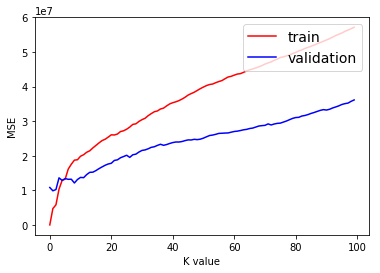

In [20]:
# training vs validation plot
plt.plot(knn_training_errors, 'r-', label = 'train')
plt.plot(knn_validation_error, 'b-', label = 'validation')
plt.legend(loc='upper right', fontsize = 14)
plt.xlabel('K value')
plt.ylabel('MSE')

### Test the model:

In [21]:
neighbors = list(range(1,30,1))
optimal_k = neighbors[knn_validation_error.index(min(knn_validation_error))]
optimal = optimal_k +1
print('the best k is : ', optimal)

the best k is :  3


In [22]:
best_knn = KNeighborsRegressor(n_neighbors= 3)
best_knn.fit(train_split_x, train_split_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [23]:
knn_preds = best_knn.predict(val_split_x)
knn_mse = mean_squared_error(val_split_y, knn_preds)
print(knn_mse)

10233815.975752693


## DECISION TREE REGRESSOR TO PREDICT CAR PRICES

### Grid Search to find best model:

In [24]:
#import libraries
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [25]:
# Create a regressor object
regressor = DecisionTreeRegressor(random_state=0)

In [26]:
# Define the grid of hyperparameters
params = {"max_depth": [None,1,5,10], 
          "max_features": ["auto", "sqrt", "log2"], 
          "min_samples_split": [0.01, 0.05, 0.1, 0.3], 
          "max_leaf_nodes": [10, 50, 100, 250]}

In [27]:
# Instantiate a 5-fold CV grid search object 'decision_tree_grid'
decision_tree_grid = GridSearchCV(regressor, params, cv=5,scoring="neg_mean_squared_error")

In [28]:
# Fit the model to the grid
decision_tree_grid.fit(train_x_e,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [0.01, 0.05, 0.1, 0.3], 'max_leaf_nodes': [10, 50, 100, 250], 'max_depth': [None, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [29]:
# Find best hyperparametrs
best_acc = decision_tree_grid.best_score_
print(best_acc)

best_parameters = decision_tree_grid.best_params_
print(best_parameters)

-11206065.204759069
{'max_features': 'auto', 'min_samples_split': 0.1, 'max_leaf_nodes': 50, 'max_depth': 5}


### Test the model:

In [30]:
# Fit the best hyperparameters to the tree
best_tree = DecisionTreeRegressor(max_leaf_nodes = 50, min_samples_split = 0.1, max_depth = 5, max_features = 'auto')
best_tree.fit(train_x_e, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=50, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=0.1, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
test_x.head()

,boreratio,carwidth,wheelbase,carheight,carlength,stroke,curbweight,enginesize,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,-0.712848,2.077580,0.944910,0.574022,1.330392,0.347447,0.468342,-0.031064,-0.496982,0.051041,...,-0.229416,-0.229416,-0.229416,-0.229416,-0.460566,-0.160128,-0.377964,-0.229416,0.951190,-0.229416
1,-0.859073,-1.498047,-0.496873,-0.084354,-0.092751,0.987246,-0.647169,-0.569510,-0.378371,-0.475832,...,-0.229416,-0.229416,-0.229416,4.358899,-0.460566,-0.160128,-0.377964,-0.229416,-1.051315,-0.229416
2,0.712848,1.635649,1.084438,0.244834,0.902626,1.200512,1.505270,0.942279,2.586916,0.336430,...,-0.229416,-0.229416,-0.229416,-0.229416,-0.460566,-0.160128,2.645751,-0.229416,-1.051315,-0.229416
3,0.895629,1.354420,2.061129,-0.619285,1.898004,3.084366,2.599698,2.495487,-0.591871,1.499940,...,-0.229416,-0.229416,-0.229416,-0.229416,-0.460566,-0.160128,-0.377964,-0.229416,0.951190,-0.229416
4,1.297748,-0.493658,-1.582085,-1.113067,-0.627458,-1.429774,0.088838,1.170083,-0.259759,2.180483,...,-0.229416,-0.229416,-0.229416,-0.229416,-0.460566,-0.160128,-0.377964,-0.229416,0.951190,-0.229416


In [32]:
tree_preds = best_tree.predict(test_x)

In [33]:
tree_mse = mean_squared_error(test_y, tree_preds)
print('MSE: ', tree_mse )

MSE:  127919314.77283998


## ENSEMBLE BAGGING REGRESSOR TO PREDICT CAR PRICES

### Grid Search to find best model:

In [34]:
# Import libraries
from sklearn.ensemble import BaggingRegressor

In [35]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


bagging_res = BaggingRegressor(random_state=0)

params_bagging ={'base_estimator': [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0)],
        'n_estimators': [25, 50, 100, 250 ],
        'bootstrap_features': [False, True],
        'random_state': [0]}

bagging_grid = GridSearchCV(bagging_res, params_bagging, cv = 5, scoring = 'neg_mean_squared_error')
br_fit= bagging_grid.fit(train_x_e, train_y)

bagging_score = bagging_grid.score(test_x, test_y)

print('Best Parameters: ', br_fit.best_params_)

print('MSE: ', np.abs(bagging_score))


Best Parameters:  {'random_state': 0, 'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'), 'n_estimators': 25, 'bootstrap_features': True}
MSE:  44093285.07585897


### Test the model:

In [42]:
best_bag = BaggingRegressor(base_estimator = DecisionTreeRegressor(random_state = 0), bootstrap_features = True, n_estimators = 25, random_state = 0)
best_bag.fit(train_x_e, train_y)
bagging_preds = best_bag.predict(test_x)

In [43]:
bag_mse = mean_squared_error(test_y, bagging_preds)
print('MSE: ', bag_mse )

MSE:  44093285.07585897


## RANDOM FOREST REGRESSOR TO PREDICT CAR PRICES

### Grid Search to find best model:

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
classifier_random =RandomForestRegressor(random_state = 0)
params ={'n_estimators': [25, 50, 100, 250 ],
         "max_depth":[None,1,5,10]}
grid_random=GridSearchCV(classifier_random,params,cv=5,scoring="neg_mean_squared_error")
grid_random.fit(train_x_e,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 1, 5, 10], 'n_estimators': [25, 50, 100, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [61]:
# Fit it to the model
random_forest_grid.fit(train_x_e,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 1, 5, 10], 'n_estimators': [25, 50, 100, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [62]:
# Find the best hyperparameters
best_acc=grid_random.score(test_x, test_y)
print(best_acc)

best_parameters=grid_random.best_params_
print(best_parameters)
print('MSE: ', np.abs(best_acc))

-64169518.26408143
{'max_depth': 10, 'n_estimators': 250}
MSE:  64169518.26408143


### Test the model:

In [65]:
best_random_forest= RandomForestRegressor(max_depth = 10, n_estimators = 250)
best_random_forest.fit(train_x_e, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
random_forest_preds = best_random_forest.predict(test_x)

In [67]:
random_forest_mse = mean_squared_error(test_y, random_forest_preds)
print('MSE: ', random_forest_mse)

MSE:  64334650.941217124


### Feature Importances:

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
top_3_rf_features = []
print(top_3_rf_features)

[]
